<a href="https://colab.research.google.com/github/Rebecasuji/ibm-naan-mudhalvan/blob/main/handwritten_digital_prediction__classification_analysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten the input images
    Dense(128, activation='relu'),          # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')         # Output layer with 10 units (one for each digit) and softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)



Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2847 - accuracy: 0.9198 - val_loss: 0.1704 - val_accuracy: 0.9503
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1293 - accuracy: 0.9625 - val_loss: 0.1206 - val_accuracy: 0.9646
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0894 - accuracy: 0.9739 - val_loss: 0.1063 - val_accuracy: 0.9683
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9809 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0936 - val_accuracy: 0.9730


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")



313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9731
Test accuracy: 0.9731


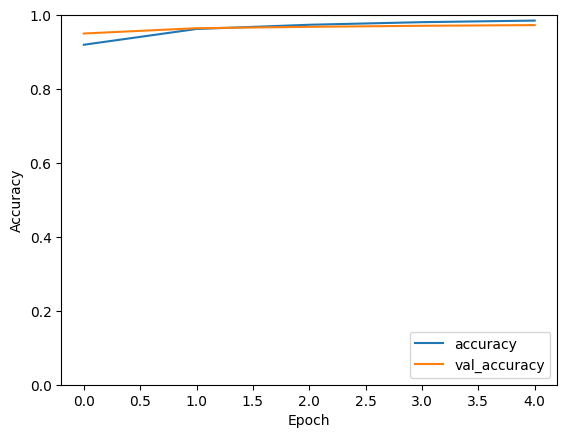

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
